In [1]:
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [106]:
content_image = imageio.imread(r"C:\Users\zongzhimin\Desktop\model\model_1500_1000.bmp")

In [107]:
content_image.shape

(1001, 1519, 3)

In [108]:
vp = content_image[:1000,:1500,2]

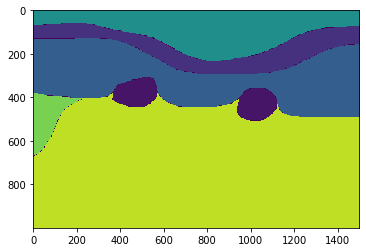

In [109]:
plt.imshow(vp)

In [110]:
vp[:,450]

Array([127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
         0,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,   0,  76,  76,  76,  76,  76,  76,
        76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  7

In [111]:
vp = np.where(vp==127,1800,vp)
vp = np.where(vp==36,2500,vp)
vp = np.where(vp==76,3500,vp)
vp = np.where(vp==204,4000,vp)
vp = np.where(vp==231,4500,vp)
vp = np.where(vp==14,5500,vp)

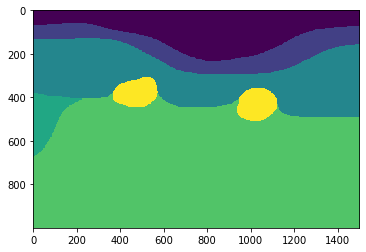

In [133]:
plt.imshow(vp)

In [132]:
len(np.where(vp == 0)[0])

0

In [131]:
np.where(vp == 0)

(array([], dtype=int64), array([], dtype=int64))

In [130]:
for i in range(1000):
    for j in range(1500):
        if vp[i,j]!=1800 and vp[i,j]!=2500 and vp[i,j]!=3500 and vp[i,j]!=4000 and vp[i,j]!=4500 and vp[i,j]!=5500:
            vp[i,j] = vp[i-1,j]

In [134]:
np.save(r'C:\Users\zongzhimin\Desktop\model\vp_1500_1000',vp)

In [135]:
vp.shape

(1000, 1500)

In [136]:
vpdata = vp

In [137]:
vsdata = vpdata / np.sqrt(3)

In [6]:
# img = Image.open(r"C:\Users\zongzhimin\Desktop\model\model.bmp")

In [22]:
# img = img.resize((300, 200))
# img.save(r"C:\Users\zongzhimin\Desktop\model\model_200_300.jpg")

In [5]:
m_rho = np.fromfile(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m.rho',dtype=np.float32)
m_vp = np.fromfile(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m.vp',dtype=np.float32)
m_vs = np.fromfile(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m.vs',dtype=np.float32)

In [8]:
m_rho = m_rho.reshape(300,200)
m_vp = m_vp.reshape(300,200)
m_vs = m_vs.reshape(300,200)

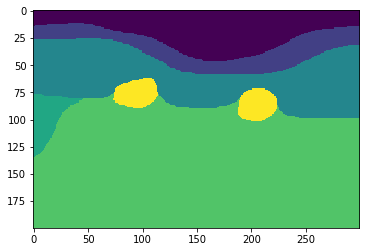

In [11]:
plt.imshow(m_vs.T)

In [15]:
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m_rho_200_300.txt',m_rho.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m_vp_200_300.txt',m_vp.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m_vs_200_300.txt',m_vs.T)